In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('/content/Traffic.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [87]:
df.shape

(2976, 9)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [89]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [90]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [91]:
df.duplicated().sum()

0

In [92]:
df['Traffic Situation'].unique()

array(['low', 'normal', 'heavy', 'high'], dtype=object)

In [93]:
df['Day of the week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

In [94]:
day_mapping = {
    'Friday': 1,
    'Saturday': 2,
    'Sunday': 3,
    'Monday': 4,
    'Tuesday': 5,
    'Wednesday': 6,
    'Thursday': 7,
}

situation_mapping = {
    'low': 0,
    'normal': 1,
    'heavy' : 2,
    'high' : 3
}

df['Day of the week'] = df['Day of the week'].map(day_mapping)
df['Traffic Situation'] = df['Traffic Situation'].map(situation_mapping)

In [95]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,5,31,0,4,4,39,0
1,12:15:00 AM,10,5,49,0,3,3,55,0
2,12:30:00 AM,10,5,46,0,3,6,55,0
3,12:45:00 AM,10,5,51,0,2,5,58,0
4,1:00:00 AM,10,5,57,6,15,16,94,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   int64 
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 209.4+ KB


In [97]:
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')
df['Time'] = df['Time'].dt.strftime('%H:%M:%S')

In [98]:
def extract_time(text):
  time = text.split(":")
  hour, minute = int(time[0]), int(time[1])
  total_minute = hour * 60 + minute
  return total_minute
df['Time'] = df['Time'].apply(extract_time)

In [99]:
df.head(10)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,0,10,5,31,0,4,4,39,0
1,15,10,5,49,0,3,3,55,0
2,30,10,5,46,0,3,6,55,0
3,45,10,5,51,0,2,5,58,0
4,60,10,5,57,6,15,16,94,1
5,75,10,5,44,0,5,4,53,0
6,90,10,5,37,0,1,4,42,0
7,105,10,5,42,4,4,5,55,0
8,120,10,5,51,0,9,7,67,0
9,135,10,5,34,0,4,7,45,0


<Axes: >

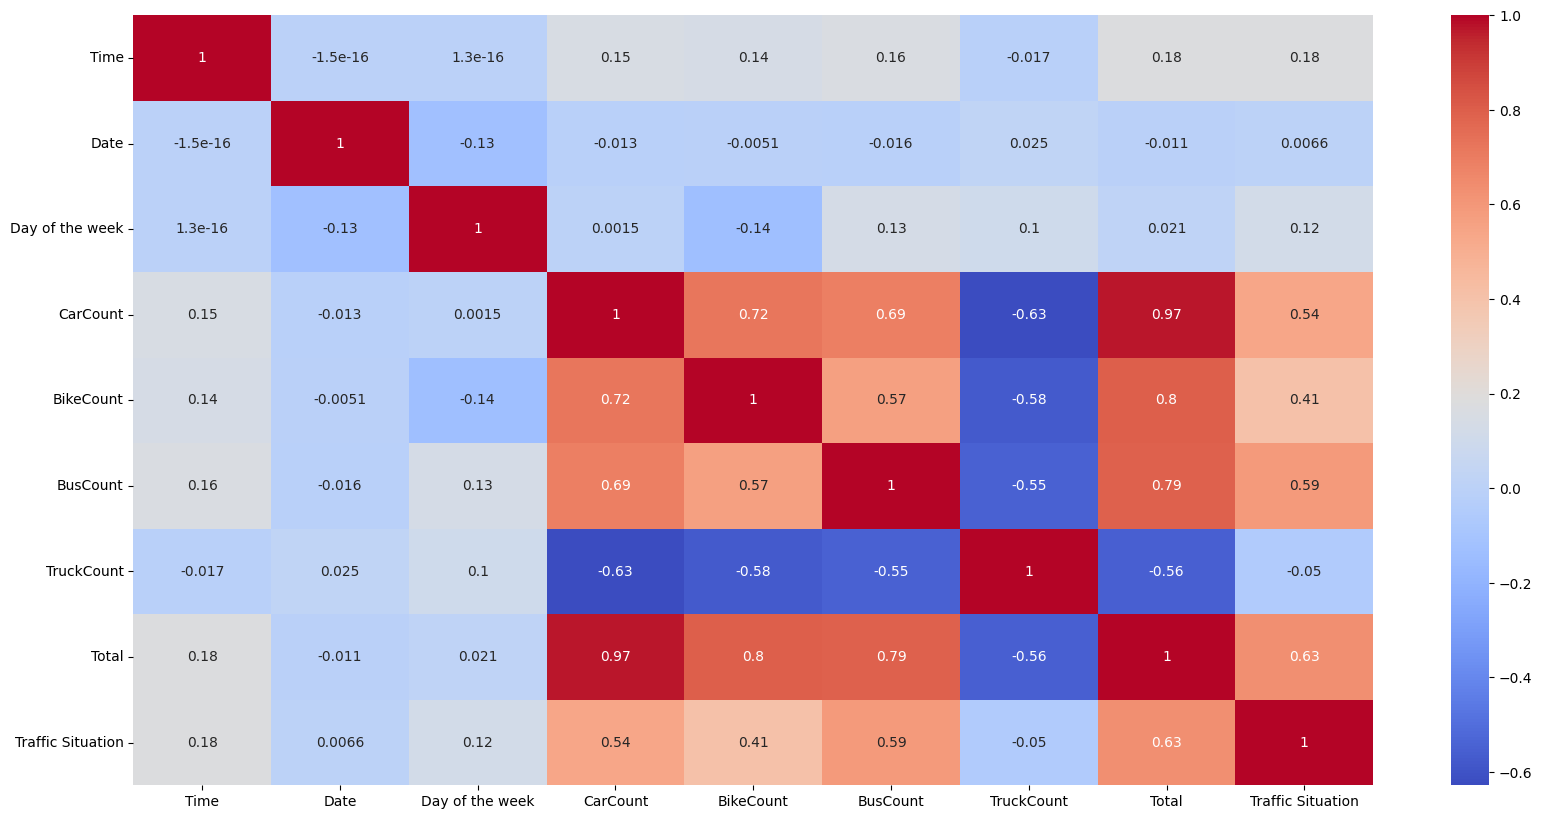

In [100]:
df_corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df_corr, annot = True, cmap = 'coolwarm')

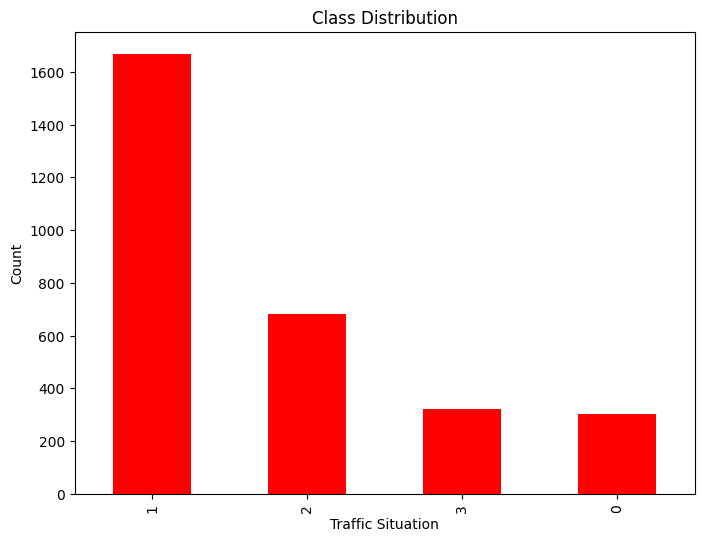

The dataset is imbalanced


In [101]:
# df = pd.read_csv('/content/Traffic.csv')

class_distribution = df['Traffic Situation'].value_counts()

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='red')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

if class_distribution.std() < 5:
  print('The dataset is balanced')
else:
  print('The dataset is imbalanced')

Scaling

In [102]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

<Axes: >

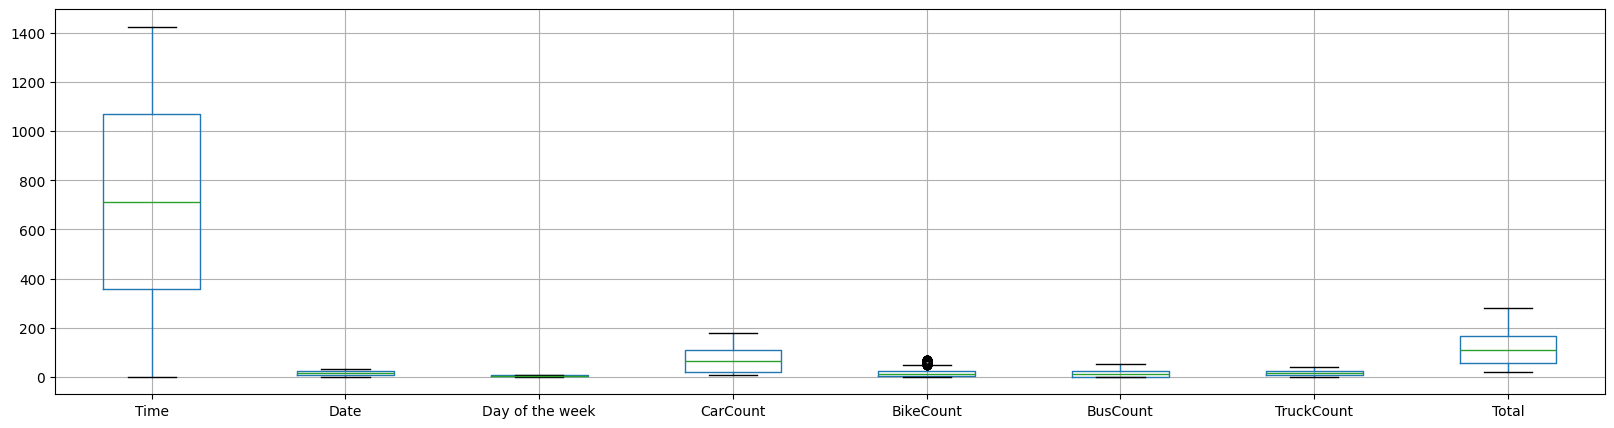

In [103]:
plt.figure(figsize = (20,5))
df.boxplot(column = ['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total'])

In [104]:
x = df.drop(columns=["Traffic Situation"])
y = df['Traffic Situation']

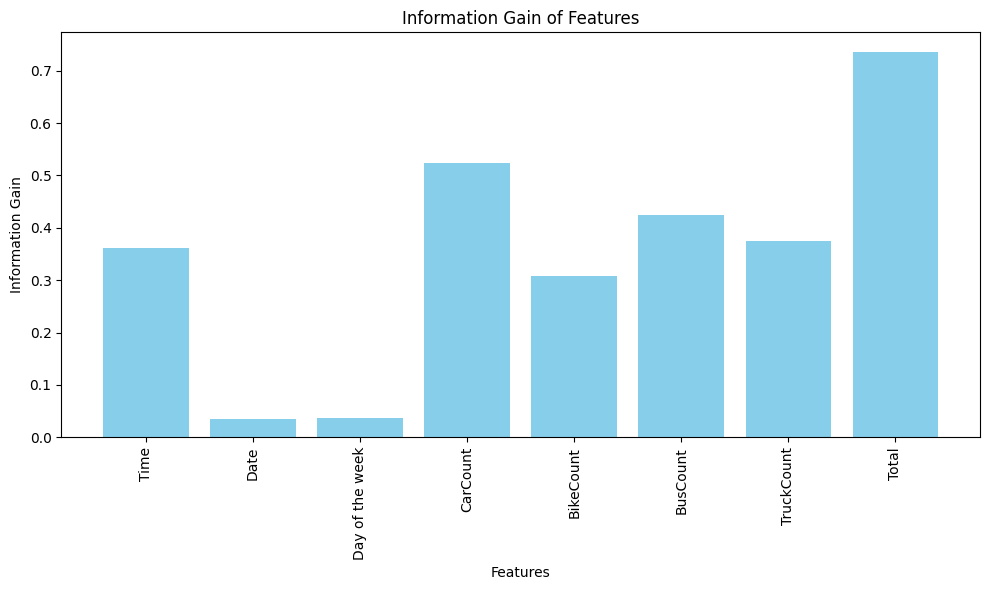

In [105]:
from sklearn.feature_selection import mutual_info_classif

information_gain = mutual_info_classif(x, y, random_state=1)
plt.figure(figsize = (10,6))
plt.bar(range(len(information_gain)), information_gain, color = 'skyblue')
plt.xticks(range(len(information_gain)), x.columns, rotation = 90)
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.title('Information Gain of Features')
plt.tight_layout()
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)

In [107]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

K-Nearest Neighbors:
Accuracy: 0.9
Precision: 0.903
Recall: 0.905
F1 Score: 0.904
Confusion Matrix:


<Axes: >

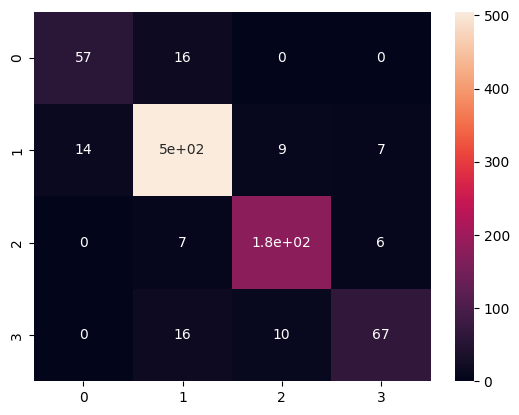

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

print('K-Nearest Neighbors:')
print('Accuracy:', round(accuracy_score(y_test, y_pred_knn), 2))
print('Precision:', round(precision_score(y_test, y_pred_knn, average='weighted'), 3))
print('Recall:', round(recall_score(y_test, y_pred_knn, average='weighted'), 3))
print('F1 Score:', round(f1_score(y_test, y_pred_knn, average='weighted'), 3))
print('Confusion Matrix:')
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True)

Decision Tree Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:


<Axes: >

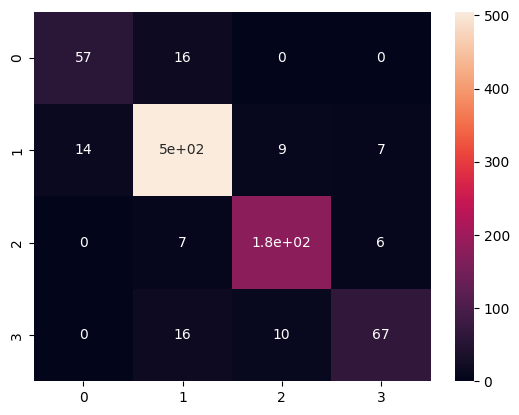

In [114]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

y_pred_dt = decision_tree.predict(x_test)

print("Decision Tree Classifier:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 2))
print("Precision:", round(precision_score(y_test, y_pred_dt,average='weighted'), 2))
print("Recall:", round(recall_score(y_test, y_pred_dt,average='weighted'), 2))
print("F1 Score:", round(f1_score(y_test, y_pred_dt,average='weighted'), 2))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True)

Random Forest Classifier:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Confusion Matrix:


<Axes: >

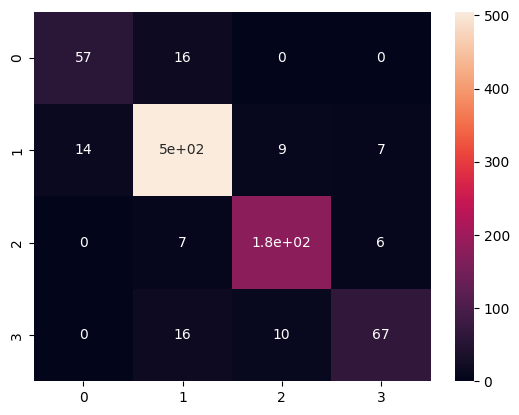

In [119]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

y_pred_rf = random_forest.predict(x_test)

print("Random Forest Classifier:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 2))
print("Precision:", round(precision_score(y_test, y_pred_rf,average='weighted'), 2))
print("Recall:", round(recall_score(y_test, y_pred_rf,average='weighted'), 2))
print("F1 Score:", round(f1_score(y_test, y_pred_rf,average='weighted'), 2))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True)

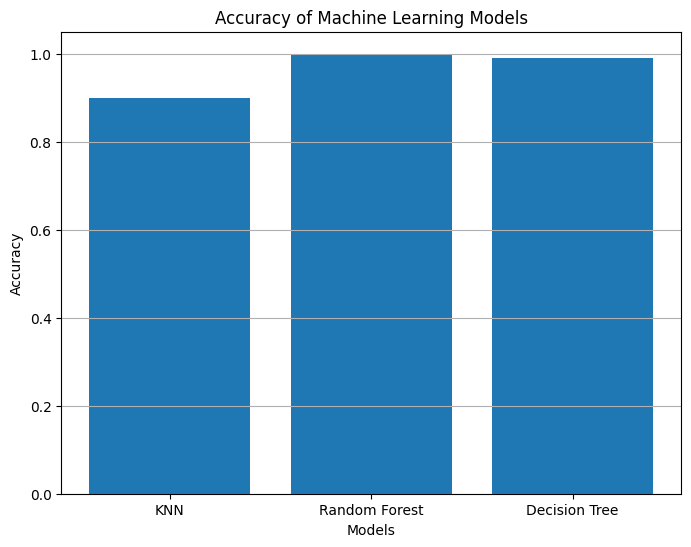

In [120]:
models = ['KNN', 'Random Forest', 'Decision Tree']

accuracies = [0.9, 1.0, 0.99]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies)

plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y')

plt.show()